# Almost to final notebook for propagation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from slab import SlabExact
%matplotlib widget
plt.style.use('dark_background')

In [2]:
A = SlabExact(symmetric=True)  # simple core cladding step refractive index

# Some input functions

In [3]:
def quadratic_piecewise(x):
    conds = [(x<-.5), ((-.5<=x)*(x<=.5)), (x>.5)]
    funcs = [0, lambda x: .25-x**2, 0]
    return np.piecewise(x, conds, funcs)
    
def modified_dist(x):
    return (x-1/4) * np.exp(-(x-1/2)**2)  

def odd_modified_dist(x):
    return x * np.exp(-x**2)
    
def normal_dist(x):
    return np.exp(-x**2)


## Propagation using piecewise quadratic

In [4]:
# Set input function
f0 = quadratic_piecewise

In [5]:
# Set extra arguments
field_type = 'TE'
sign = '+1'
phase = None
exact_args = (field_type, sign, phase)


In [6]:
xs = np.linspace(-20,20,2000)

In [7]:
Propagator = A.propagator()

In [12]:
Psci = Propagator(f0=f0, Lx=-1, Rx=1, LZ=0, RZ=120, NZ=1500, field_type=field_type, sign='+1')

0 / 150
1 / 150
2 / 150
3 / 150
4 / 150
5 / 150
6 / 150
7 / 150
8 / 150
9 / 150
10 / 150
11 / 150
12 / 150
13 / 150
14 / 150
15 / 150
16 / 150
17 / 150
18 / 150
19 / 150
20 / 150
21 / 150
22 / 150
23 / 150
24 / 150
25 / 150
26 / 150
27 / 150
28 / 150
29 / 150
30 / 150
31 / 150
32 / 150
33 / 150
34 / 150
35 / 150
36 / 150
37 / 150
38 / 150
39 / 150
40 / 150
41 / 150
42 / 150
43 / 150
44 / 150
45 / 150
46 / 150
47 / 150
48 / 150
49 / 150
50 / 150
51 / 150
52 / 150
53 / 150
54 / 150
55 / 150
56 / 150
57 / 150
58 / 150
59 / 150
60 / 150
61 / 150
62 / 150
63 / 150
64 / 150
65 / 150
66 / 150
67 / 150
68 / 150
69 / 150
70 / 150
71 / 150
72 / 150
73 / 150
74 / 150
75 / 150
76 / 150
77 / 150
78 / 150
79 / 150
80 / 150
81 / 150
82 / 150
83 / 150
84 / 150
85 / 150
86 / 150
87 / 150
88 / 150
89 / 150
90 / 150
91 / 150
92 / 150
93 / 150
94 / 150
95 / 150
96 / 150
97 / 150
98 / 150
99 / 150
100 / 150
101 / 150
102 / 150
103 / 150
104 / 150
105 / 150
106 / 150
107 / 150
108 / 150
109 / 150
110 / 150


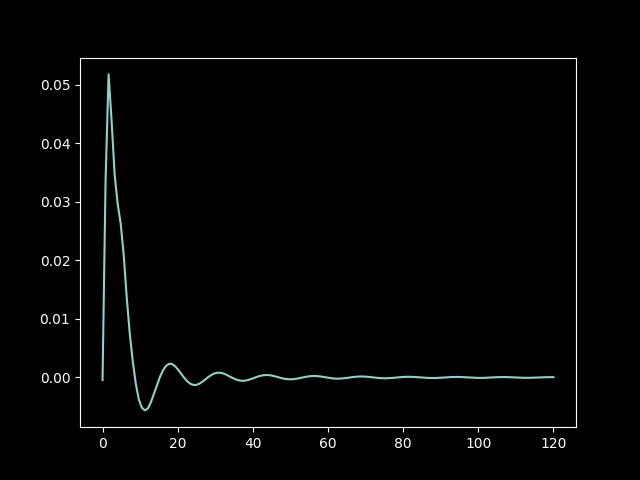

In [13]:
plt.close('all')
plt.plot(Psci.Zs, Psci.alphas.real);

# Cross sections at input and overhead views
Just the radiation portion, no guided yet

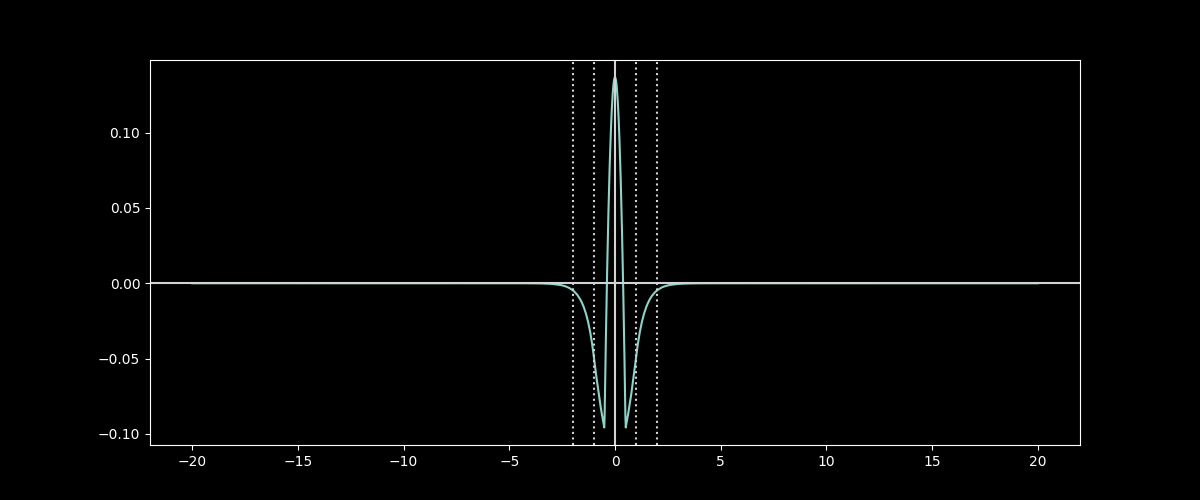

In [124]:
A.plot_field_1d(Psci.slice_propagate, xs=xs)  # full radiation

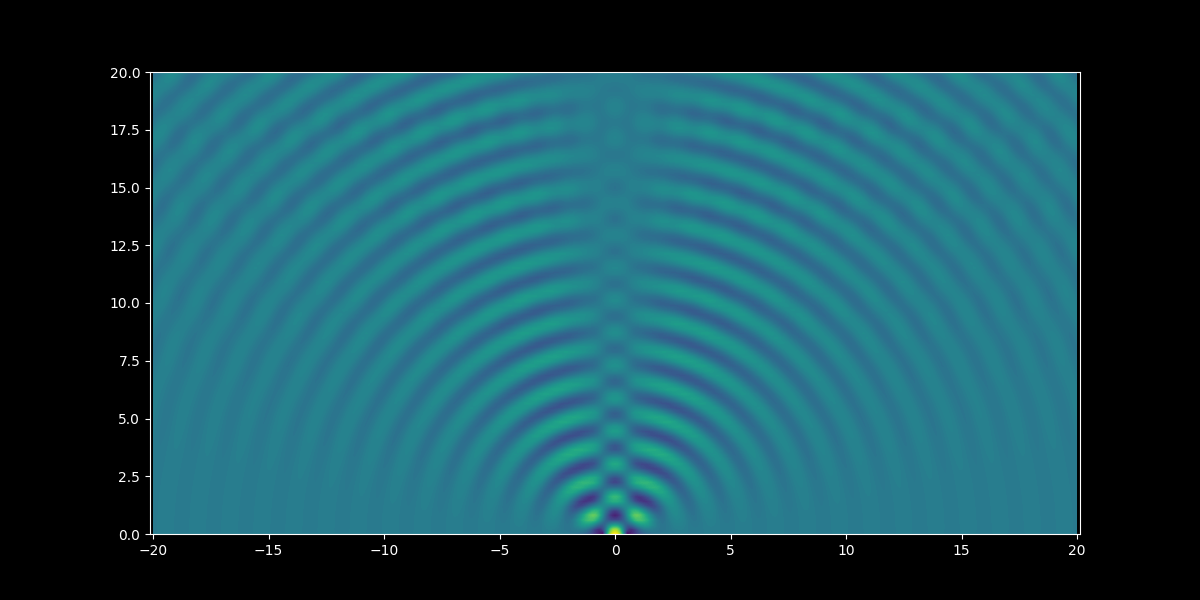

In [134]:
A.plot_field_2d(Psci.propagate, 'full', xs=xs, zmax=20, figsize=(12,6), colorbar=False);
plt.axis('equal');

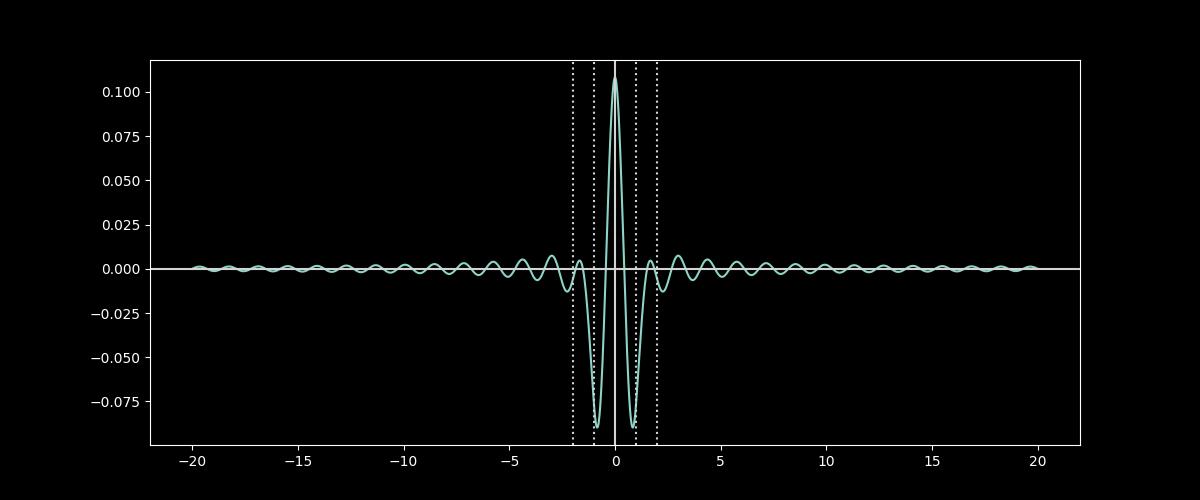

In [125]:
A.plot_field_1d(Psci.slice_propagate, 0, 'z', 'propagating', xs=xs)  # Just propagating

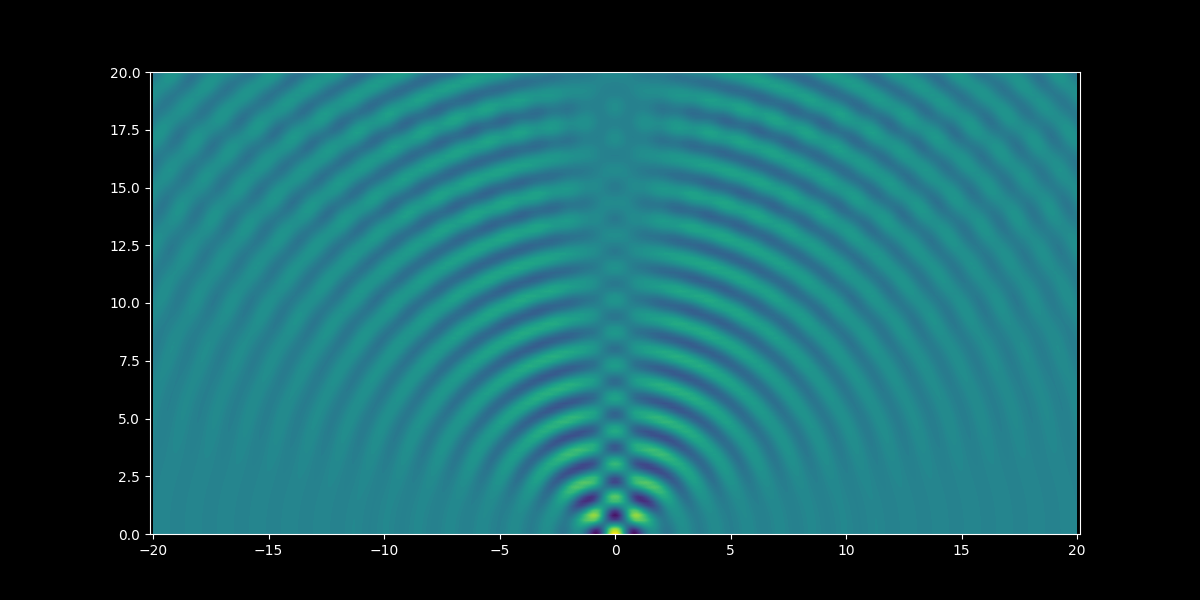

In [133]:
A.plot_field_2d(Psci.propagate, 'propagating', xs=xs, zmax=20, figsize=(12,6), colorbar=False);
plt.axis('equal');

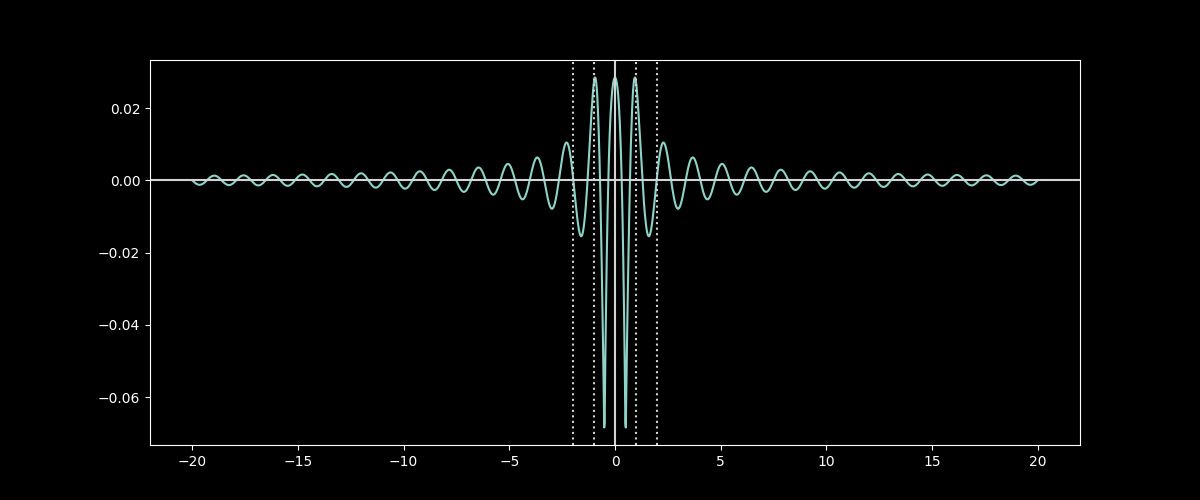

In [40]:
A.plot_field_1d(Psci.slice_propagate, 0, 'z', 'evanescent', xs=xs)

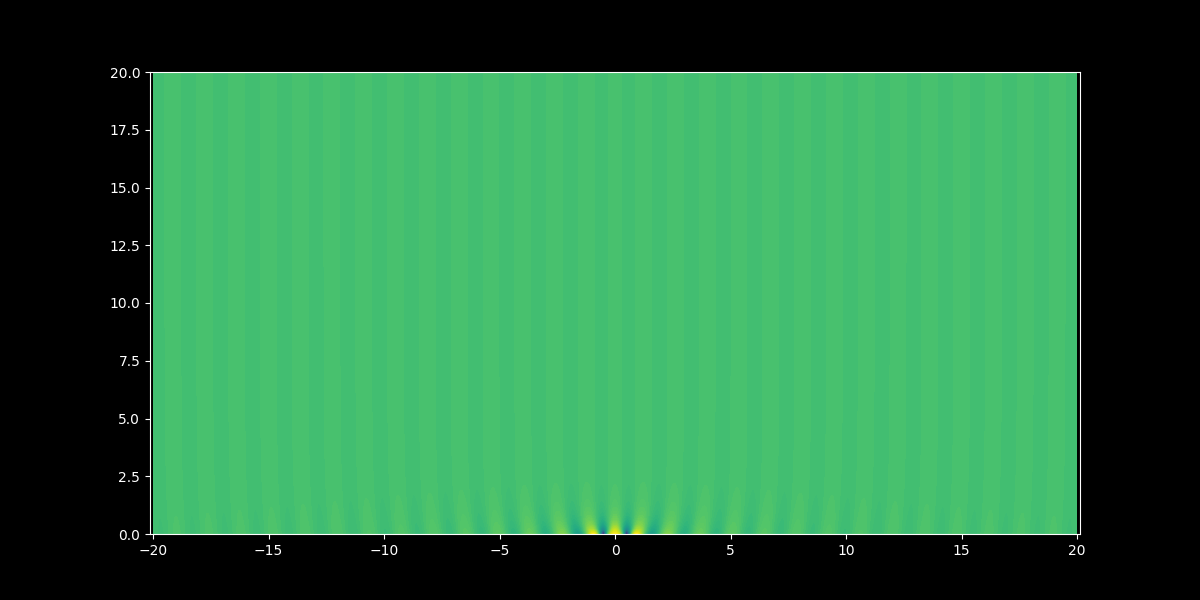

In [135]:
A.plot_field_2d(Psci.propagate, 'evanescent', xs=xs, zmax=20, figsize=(12,6), colorbar=False);
plt.axis('equal');

# Surface Plot

Full radiation field

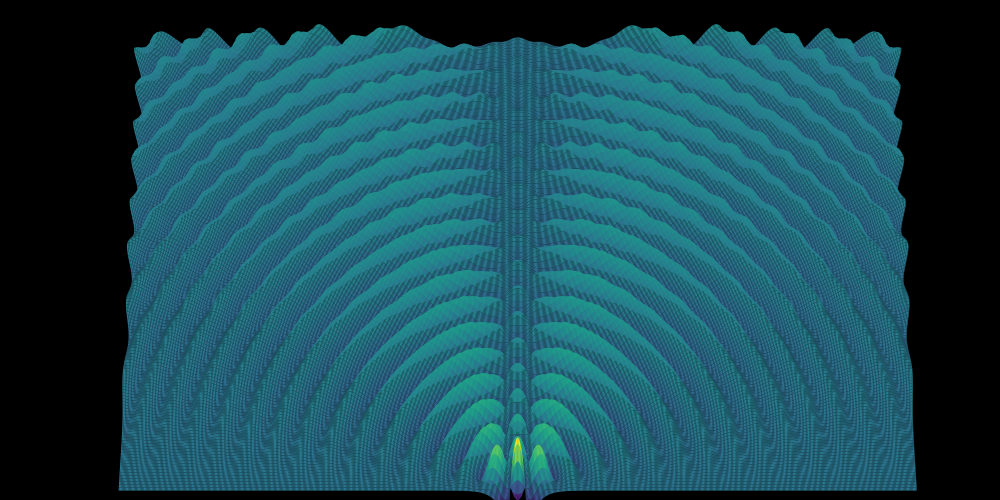

In [136]:
A.plot_field_2d(Psci.propagate, surface=True, xs=np.linspace(-20,20,2000), colorbar=False, zoom=3,
                azim=-90, elev=75, 
                zmax=24, zref=480,
                rstride=3, cstride=3,
                
               )

## Add in guided mode

There is one even and one odd guided mode.  Let's try and add multiples of the guided one.

In [9]:
from fiberamp.fiber.microstruct.bragg import plotlogf
from scipy.optimize import newton
from scipy.integrate import quad

In [10]:
# plotlogf(A.determinant, A.K_low, A.K_high, -.2, .2, 'TE', 'guided', iref=100, rref=100,levels=100)

In [11]:
beta3 = newton(A.determinant, 4.75, args=('TE', 'guided')).real
beta4 = newton(A.determinant, 5.1, args=('TE', 'guided')).real

Fs3 = A.fields(beta3, field_type='TE', mode_type='guided')
Fs4 = A.fields(beta4, field_type='TE', mode_type='guided')

In [12]:
# A.plot_field_1d(Fs4, plot_axis=True,xs=xs, linewidth=.9, color='g', label='TE_even', plot_regions=True, hatch=None)
# ax = plt.gca()
# A.add_1d_plot(ax, lambda x: 4*Fs4(0).real*f0(x), xs=xs)

In [13]:
# A.plot_field_2d(Fs4, surface=True, xs=np.linspace(-20,20,1500), colorbar=False, zoom=3,
#                 azim=-90, elev=75, 
#                 zmax=24, zref=480,
#                 rstride=5, cstride=5, 
#                )

In [14]:
integrand = lambda x: Fs4(x) * Fs4(x).conjugate()
cf1 = quad(integrand, -35,35, complex_func=True)[0].real

In [15]:
integrand = lambda x: f0(x) * Fs4(x).conjugate()
cf2 = quad(integrand, -1,1, complex_func=True)[0].real

In [16]:
alpha = cf2/cf1

In [148]:
full = lambda x: Psci.slice_propagate(x) + alpha * Fs4(x)
Full = lambda x, zs: Psci.propagate(x, zs=zs) + alpha * Fs4(x, zs=zs)

## Full field slice at input end

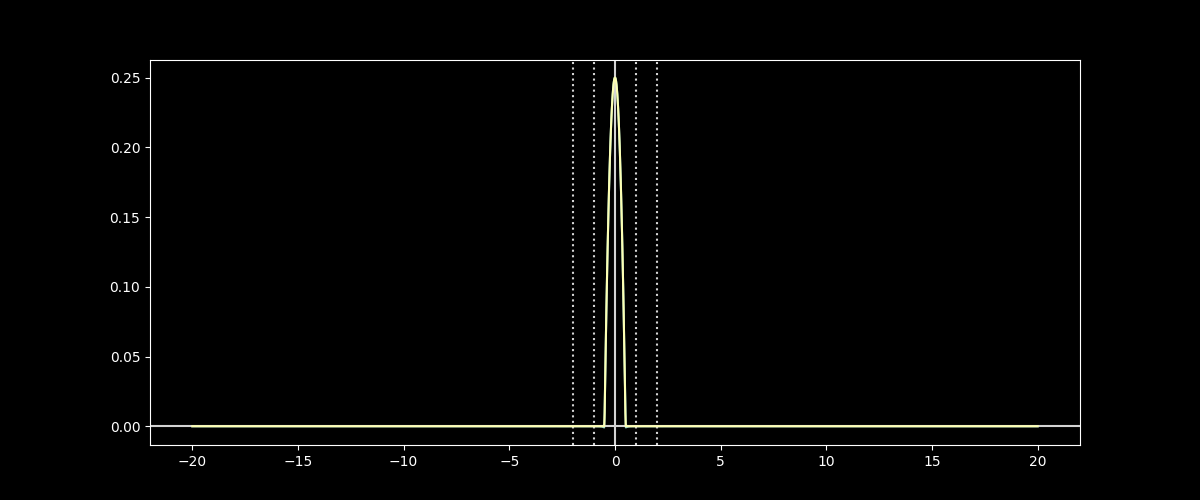

In [149]:
A.plot_field_1d(full, xs=np.linspace(-20,20,10000), part='real')
ax = plt.gca()
A.add_1d_plot(ax, quadratic_piecewise, xs=np.linspace(-20,20,2000))

## Full Field

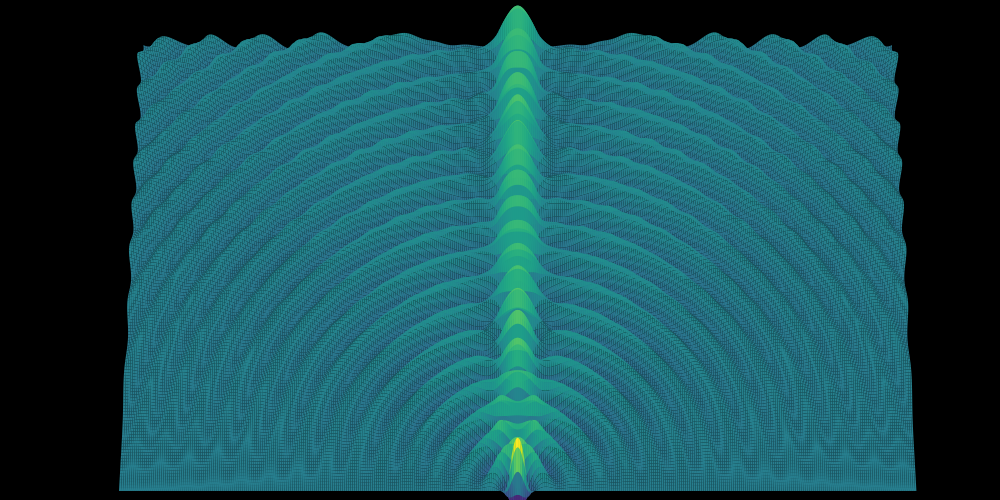

In [114]:
A.plot_field_2d(Full, surface=True, xs=np.linspace(-20,20,1200), colorbar=False, zoom=3,
                azim=-90, elev=75, 
                zmax=24, zref=480,
                rstride=3, cstride=3,
               )

# Save data for three.js visualization

Input function for line

In [7]:
f0s = f0(xs)

Field strengths, divided into guided, evanescent radiation and propagating radiation

In [17]:
rad_ys_propagating = Psci.propagate(np.linspace(-20,20,1200), zs=np.linspace(0,24,480), portion='propagating')
rad_ys_evanescent = Psci.propagate(np.linspace(-20,20,1200), zs=np.linspace(0,24,480), portion='evanescent')

In [18]:
guided_ys = alpha * Fs4(np.linspace(-20,20,1200), zs=np.linspace(0,24,480))

Underlying grid points

In [19]:
Xs, Zs = np.meshgrid(np.linspace(-20,20,1200), np.linspace(0,24,480))

## Functions for data organization and saving

In [14]:
def get_trig_indices(mesh_array):
    '''Get triangle index list for three js mesh formation via indexed buffer geometry.'''
    if len(mesh_array.shape) <= 1:
        raise ValueError('Provide meshgrid array as input.')
    Nz, Nx = mesh_array.shape[0], mesh_array.shape[1]
    l_inds = Nx * Nz
    indices =  np.arange(0, l_inds).reshape((Nx, Nz)).T  # Note transpose
    fbases = indices[:Nz-1, :Nx-1].T.flatten()  # Note transpose and index switch due to transpose
    f1 = np.array([[i, i+Nz, i+1] for i in fbases], dtype=int)
    f2 = np.array([[i+1, i+Nz, i+Nz+1] for i in fbases], dtype=int)
    return np.concatenate((f1, f2))


def get_base_vertices(Xs, Zs):
    '''Get vertices of triangles with zero height (y component in three.js).'''
    if Xs.shape != Zs.shape:
        raise ValueError('Provide meshgrid arrays (ie Xs, Zs = np.meshgrid(xs,zs)) as inputs.')
    Base = np.array([Xs, np.zeros_like(Xs), Zs], dtype=float)
    L = Xs.shape[0] * Xs.shape[1]
    base_vertices = Base.T.reshape((L,3))
    return base_vertices


def create_height_array_from_complex(ys, Xs):
    '''Get data for height from complex ys input (needs to be formatted as list:
        [ys[0].real, ys[0].imag, ys[1].real, ys[1].imag, ... ].'''
    L = Xs.shape[0] * Xs.shape[1]
    Ys = np.array([ys.real, ys.imag], dtype=float)
    heights = Ys.T.reshape((L,2))
    return heights


def save_trig_indices_as_json(filepath, mesh_array):
    indices = get_trig_indices(mesh_array)
    with open(filepath + '.json', 'w') as outfile:
        json.dump(indices.flatten().tolist(), outfile, separators=(',', ':'),
                  sort_keys=True, indent=4)


def save_base_vertices_as_json(filepath, Xs, Zs):
    base_vertices = get_base_vertices(Xs, Zs)
    with open(filepath + '.json', 'w') as outfile:
        json.dump(base_vertices.flatten().tolist(), outfile, separators=(',', ':'),
                  sort_keys=True, indent=4)
        

def save_heights_as_json(filepath, ys, Xs):
    heights= create_height_array_from_complex(ys, Xs)
    with open(filepath + '.json', 'w') as outfile:
        json.dump(heights.flatten().tolist(), outfile, separators=(',', ':'),
                  sort_keys=True, indent=4)

def save_values_as_json(filepath, f0s):
    with open(filepath + '.json', 'w') as outfile:
        json.dump(f0s.tolist(), outfile, separators=(',', ':'),
                  sort_keys=True, indent=4)


In [12]:
prefix='/home/pv/learning/index_buffered/'

In [42]:
save_trig_indices_as_json(prefix + 'trig_indices_new', Xs)

In [44]:
save_base_vertices_as_json(prefix + 'base_vertices_new', Xs, Zs)

In [45]:
save_heights_as_json(prefix + 'guided_heights', guided_ys, Xs)

In [46]:
save_heights_as_json(prefix + 'evanescent_heights', rad_ys_evanescent, Xs)

In [47]:
save_heights_as_json(prefix + 'propagating_heights', rad_ys_propagating, Xs)

In [13]:
save_values_as_json(prefix + 'f0s', f0s)

In [15]:
save_values_as_json(prefix + 'x0s', xs)